In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# Load data
data = pd.read_csv('User_Engagement.csv')
data1= pd.read_csv('User_Proficiency.csv')

In [88]:
data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00


In [89]:
data1.head()

,USERID,NAME,SKILLNAME,PROFICIENCYLEVEL
0,273,Madelin,DevOps practices,Advanced
1,772,Bernie,NaN,NaN
2,17,Fransisco,NaN,NaN
3,960,Lelia,NaN,NaN
4,268,Rhodia,Natural language processing,Intermediate


In [90]:
combined_data = pd.merge(data, data1, on='USERID', how='inner')

In [91]:
combined_data.head()

,USERID,NAME_x,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,NAME_y,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Sherie,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Donnajean,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Roderigo,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Arin,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Tully,Incident response,Advanced


In [92]:
combined_data.drop('NAME_y', axis=1, inplace=True)
combined_data.rename(columns={'NAME_x': 'NAME'}, inplace=True)


In [93]:
combined_data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,Advanced


In [94]:
print(combined_data.isnull().sum())


USERID                    0
NAME                      0
TOTAL_PROJECTS            0
TOTAL_SKILLS              0
TOTAL_CERTIFICATIONS      0
ENGAGEMENT_SCORE          0
EMAILID                   0
ADDRESS                   0
PHONE                     0
ROLE                      0
DESIGNATION               0
DATA_LOADED_AT            0
SKILLNAME               364
PROFICIENCYLEVEL        364
dtype: int64


In [95]:
combined_data.dropna(subset=['SKILLNAME', 'PROFICIENCYLEVEL'], inplace=True)

In [96]:
data_processed = combined_data.drop(['USERID', 'NAME', 'DATA_LOADED_AT','PHONE'], axis=1)

In [97]:

combined_data['PROFICIENCYLEVEL'] = combined_data['PROFICIENCYLEVEL'].replace({'Advanced': 3, 'Intermediate': 2, 'Beginner': 1})


In [98]:
combined_data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,3
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,2
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,3
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),3
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,3


C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


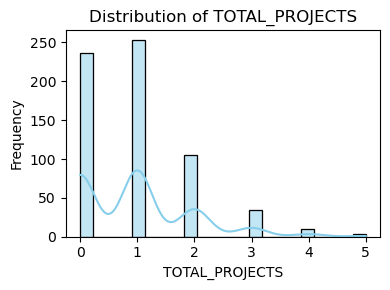

C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


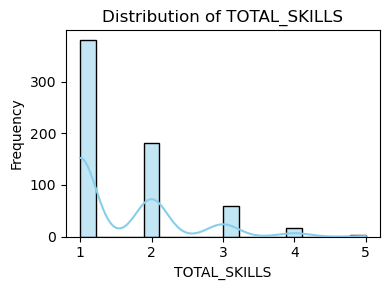

C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


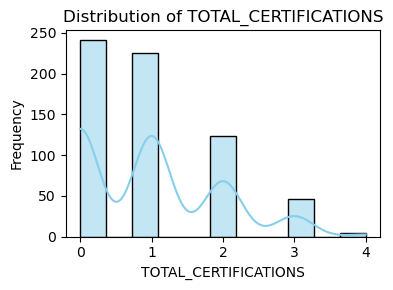

C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


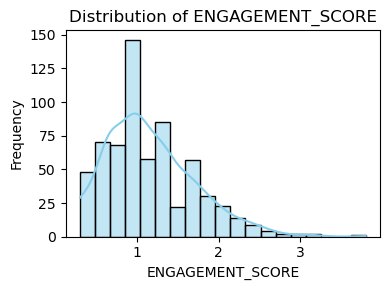

C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


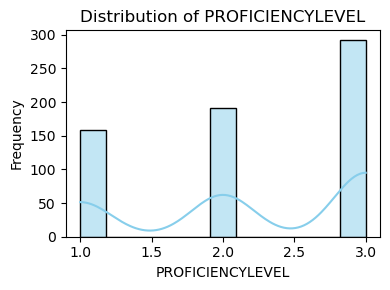

In [101]:
numerical_cols = ['TOTAL_PROJECTS', 'TOTAL_SKILLS', 'TOTAL_CERTIFICATIONS','ENGAGEMENT_SCORE','PROFICIENCYLEVEL'] 

for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(combined_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  
    plt.show()


C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BharathirajaC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

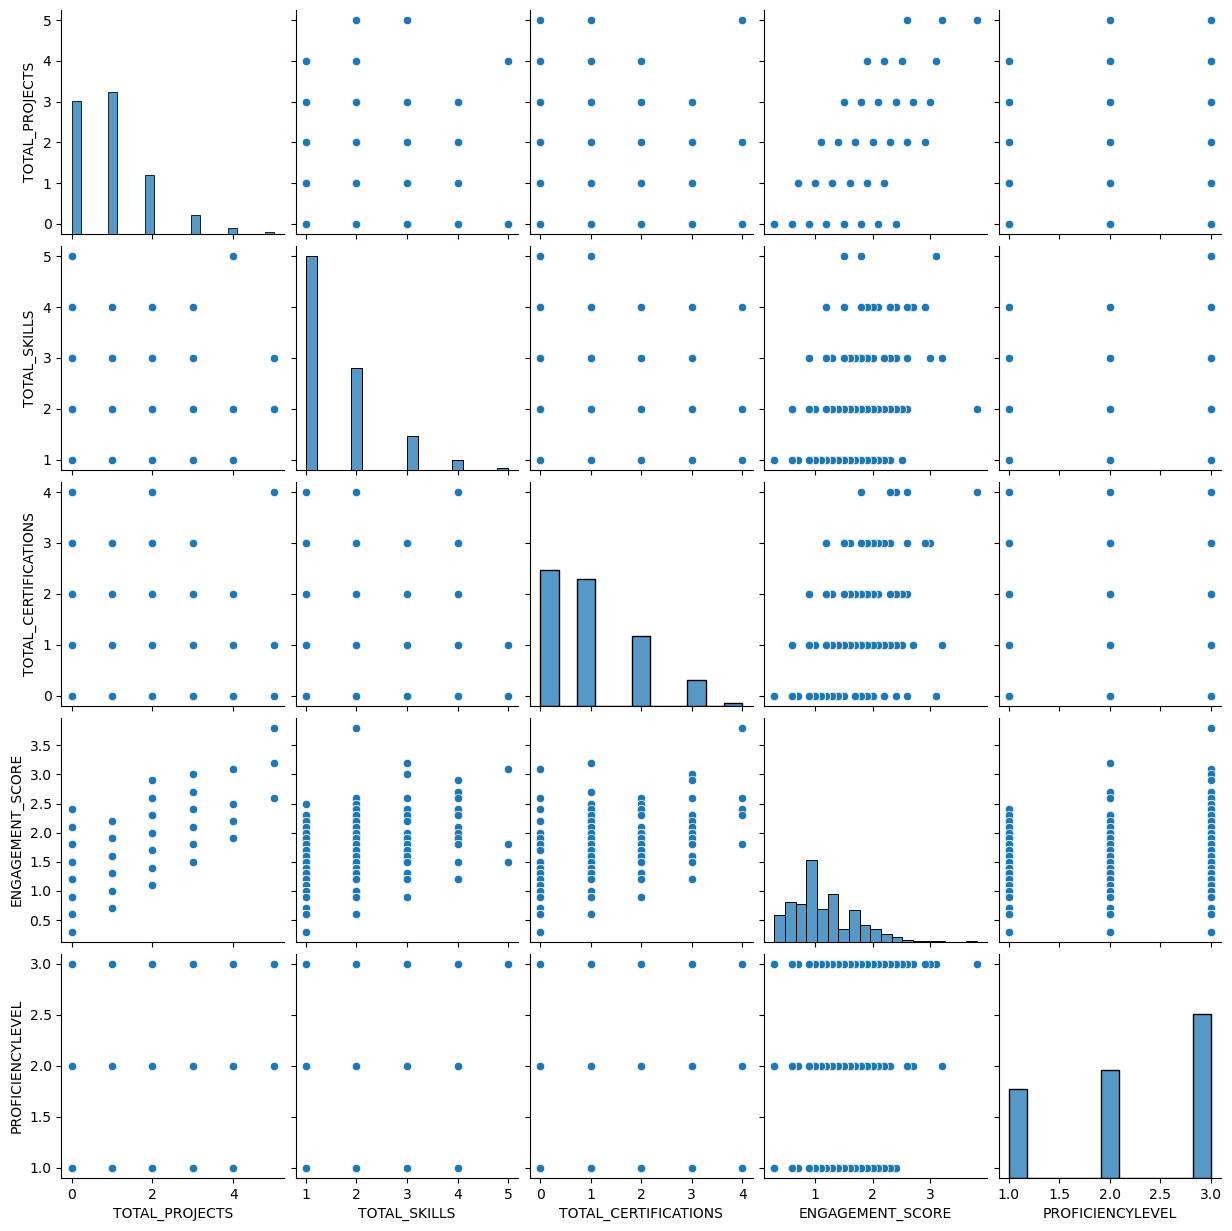

In [104]:
sns.pairplot(combined_data[numerical_cols])
plt.show()

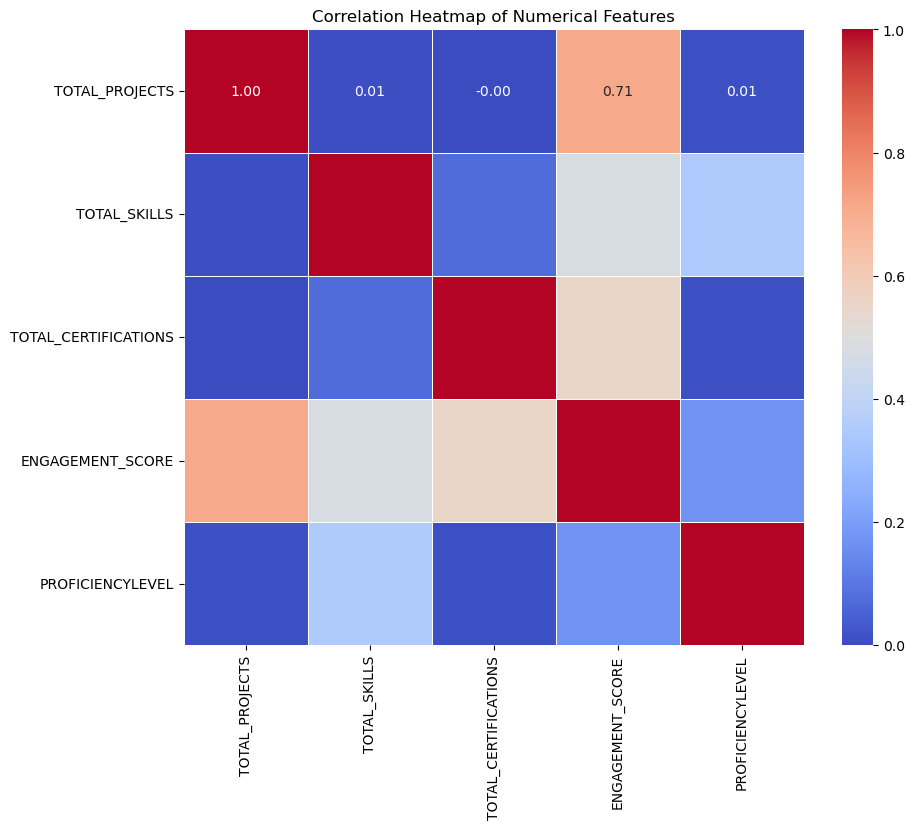

In [105]:
correlation_matrix = combined_data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

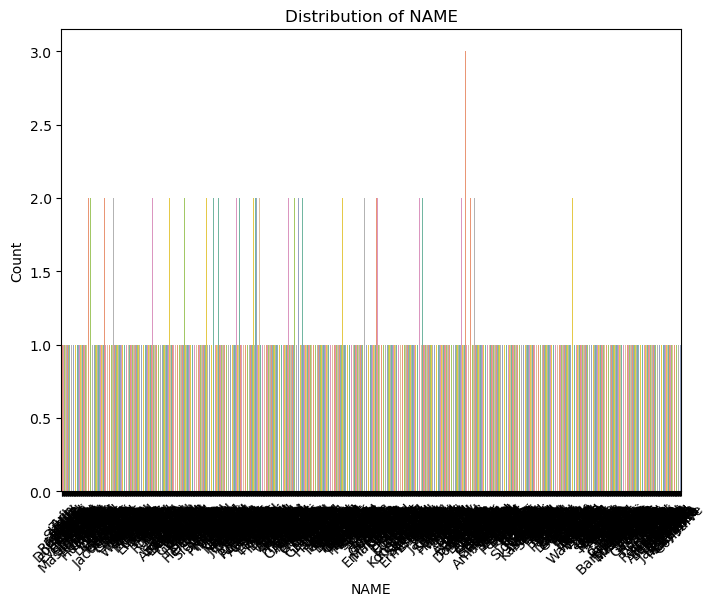

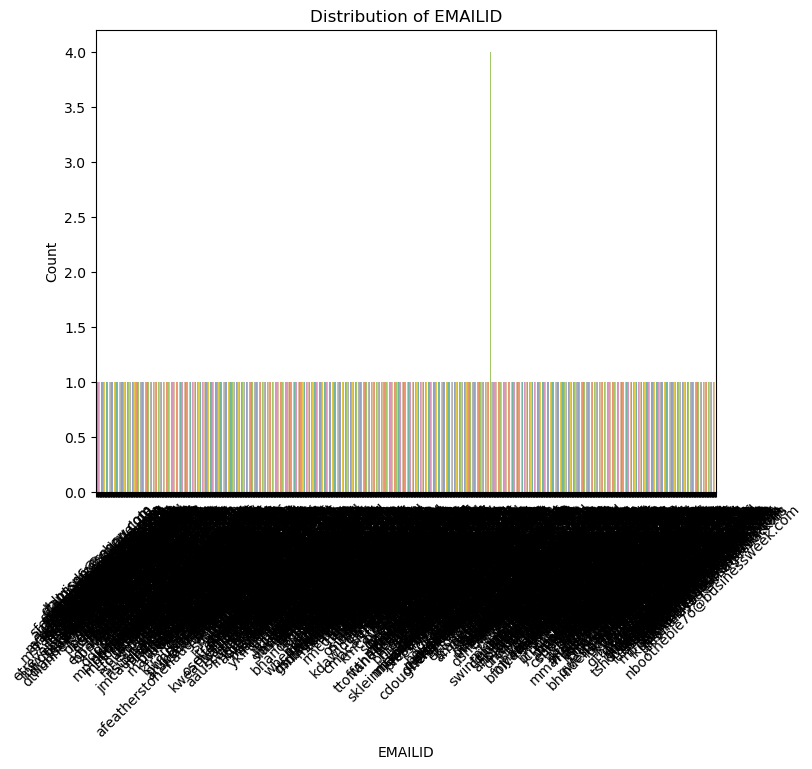

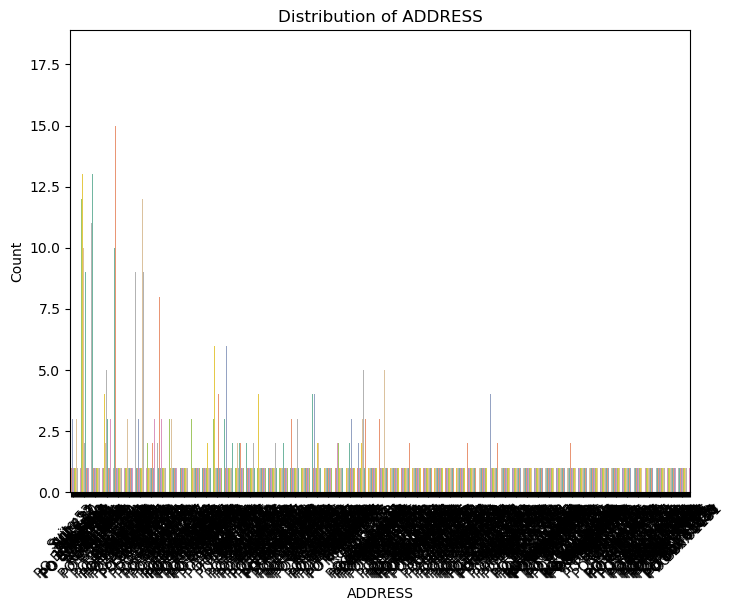

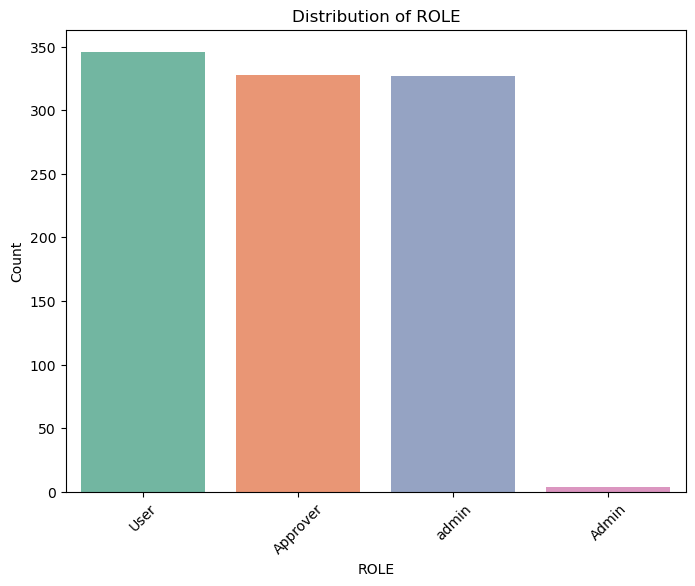

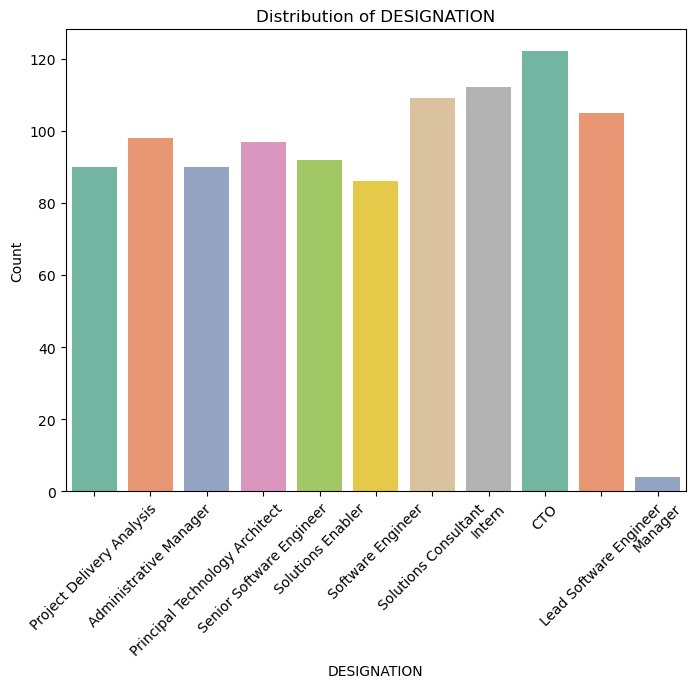

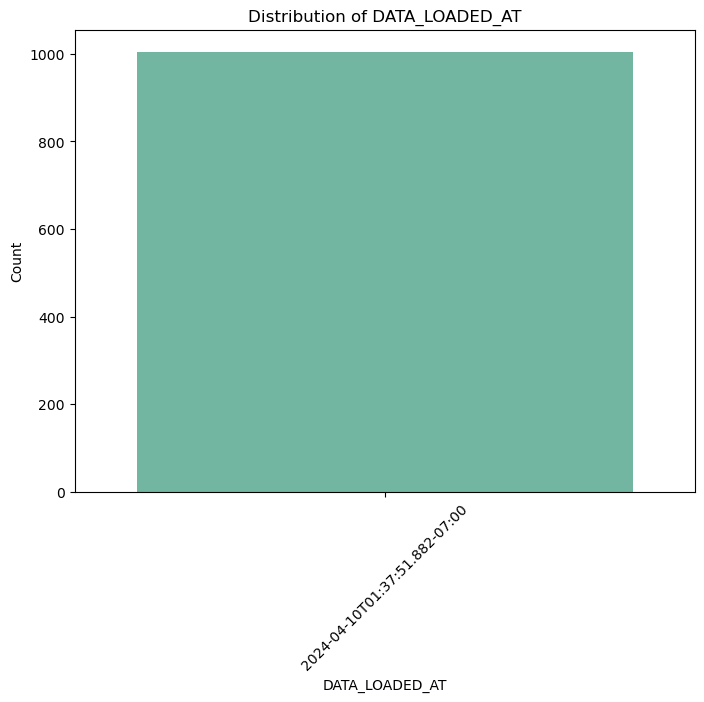

In [106]:
# Visualize distributions of categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
